In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout, Flatten

In [8]:
train_feat = np.load("datasets/train/train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']

valid_feat = np.load("datasets/valid/valid_feature.npz", allow_pickle=True)
valid_feat_X = valid_feat['features']
valid_feat_Y = valid_feat['label']

In [9]:
train_feat_X_scaled = train_feat_X / np.linalg.norm(train_feat_X, axis=-1, keepdims=True)
valid_feat_X_scaled = valid_feat_X / np.linalg.norm(valid_feat_X, axis=-1, keepdims=True)

# Convert labels to integers if they are not
train_feat_Y = train_feat_Y.astype(int)
valid_feat_Y = valid_feat_Y.astype(int)

In [10]:
def build_cnn_model():
    model = Sequential()
    
    # Input shape is (13, 768), representing 13 emoticon features, each with 768 dimensions
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(13, 768)))
    model.add(GlobalMaxPooling1D())
    
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [11]:
model = build_cnn_model()

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6005 - loss: 0.6487 - val_accuracy: 0.7935 - val_loss: 0.5050
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7680 - loss: 0.5003 - val_accuracy: 0.8262 - val_loss: 0.4231
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8076 - loss: 0.4513 - val_accuracy: 0.8609 - val_loss: 0.3908
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8127 - loss: 0.4399 - val_accuracy: 0.8589 - val_loss: 0.3811
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8209 - loss: 0.4144 - val_accuracy: 0.8569 - val_loss: 0.3700
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8182 - loss: 0.4096 - val_accuracy: 0.8691 - val_loss: 0.3524
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8421 - loss: 0.3899 - val_accuracy: 0.8119 - val_loss: 0.3950
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8342 - loss: 0.3860 - val_accuracy: 0.

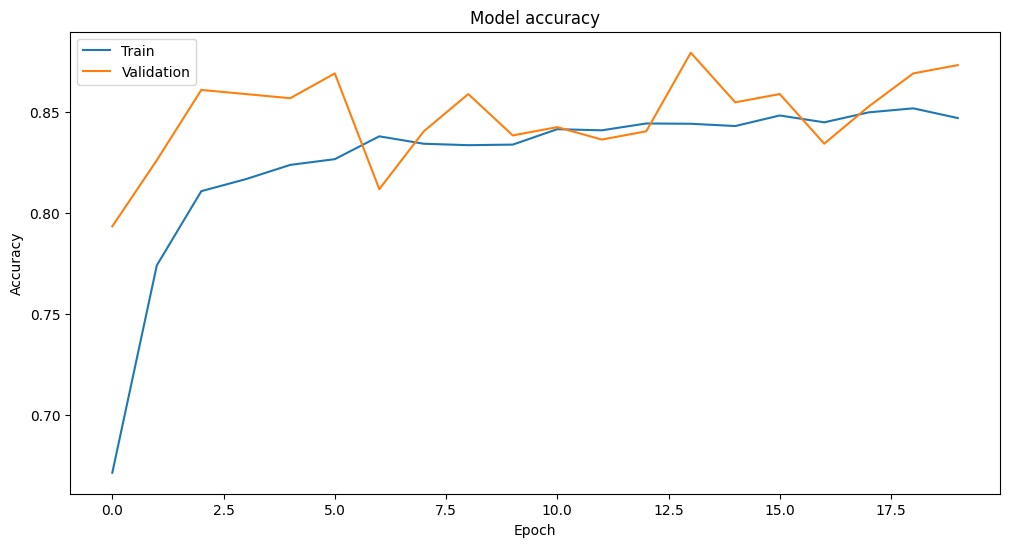

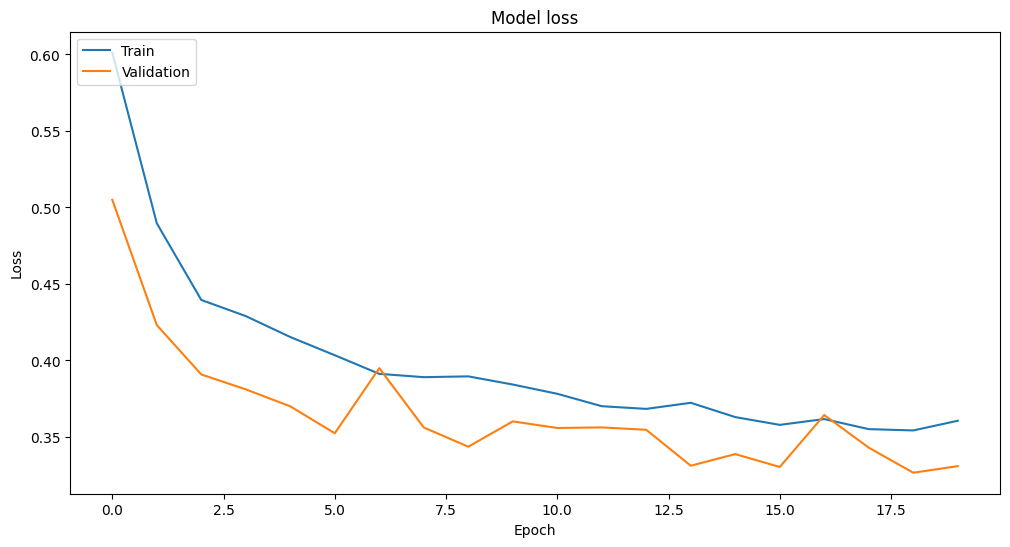

In [12]:
history = model.fit(train_feat_X_scaled, train_feat_Y, epochs=20, batch_size=32, validation_data=(valid_feat_X_scaled, valid_feat_Y))

# Plot accuracy and loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()